In [413]:
#Capstone Project Data Cleaning Plan
#import dependencies
#load data into dataframe
#Drop columns we don't need: timestamp, level, tag, race, education (race and education have already been onehot-encoded in datasource)
#Check data types
#Look for outlier values
#Check for duplicate rows

#Investigate and clean specific columns:
    #

In [414]:
#Import dependencies
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt

In [415]:
#Set path of input file
file_path = "Resources/Modified_Levels_Fyi_Salary_Data.csv"

In [416]:
#Read input file into a DataFrame
salaries_df = pd.read_csv(file_path)
salaries_df.head()

,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,...,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education
0,6/7/2017 11:33,Oracle,L3,Product Manager,127000,"Redwood City, CA",1.5,1.5,NaN,107000,...,0,0,0,0,0,0,0,0,NaN,NaN
1,6/10/2017 17:11,eBay,SE 2,Software Engineer,100000,"San Francisco, CA",5.0,3.0,NaN,0,...,0,0,0,0,0,0,0,0,NaN,NaN
2,6/11/2017 14:53,Amazon,L7,Product Manager,310000,"Seattle, WA",8.0,0.0,NaN,155000,...,0,0,0,0,0,0,0,0,NaN,NaN
3,6/17/2017 0:23,Apple,M1,Software Engineering Manager,372000,"Sunnyvale, CA",7.0,5.0,NaN,157000,...,0,0,0,0,0,0,0,0,NaN,NaN
4,6/20/2017 10:58,Microsoft,60,Software Engineer,157000,"Mountain View, CA",5.0,3.0,NaN,0,...,0,0,0,0,0,0,0,0,NaN,NaN


In [417]:
#Check for duplicate rows
duplicate_rows_df = salaries_df[salaries_df.duplicated()]
print(duplicate_rows_df.shape)
#There are no duplicate rows

(0, 28)


In [418]:
#Drop unneeded columns
salaries_df = salaries_df.drop(columns=['timestamp','level','tag','Race','Education'])
salaries_df

,company,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,basesalary,stockgrantvalue,bonus,gender,...,Masters_Degree,Bachelors_Degree,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic
0,Oracle,Product Manager,127000,"Redwood City, CA",1.5,1.5,107000,20000.0,10000.0,NaN,...,0,0,0,0,0,0,0,0,0,0
1,eBay,Software Engineer,100000,"San Francisco, CA",5.0,3.0,0,0.0,0.0,NaN,...,0,0,0,0,0,0,0,0,0,0
2,Amazon,Product Manager,310000,"Seattle, WA",8.0,0.0,155000,0.0,0.0,NaN,...,0,0,0,0,0,0,0,0,0,0
3,Apple,Software Engineering Manager,372000,"Sunnyvale, CA",7.0,5.0,157000,180000.0,35000.0,NaN,...,0,0,0,0,0,0,0,0,0,0
4,Microsoft,Software Engineer,157000,"Mountain View, CA",5.0,3.0,0,0.0,0.0,NaN,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62637,Google,Software Engineer,327000,"Seattle, WA",10.0,1.0,155000,150000.0,22000.0,NaN,...,0,0,0,0,0,0,0,0,0,0
62638,Microsoft,Software Engineer,237000,"Redmond, WA",2.0,2.0,146900,73200.0,16000.0,NaN,...,0,0,0,0,0,0,0,0,0,0
62639,MSFT,Software Engineer,220000,"Seattle, WA",14.0,12.0,157000,25000.0,20000.0,NaN,...,0,0,0,0,0,0,0,0,0,0
62640,Salesforce,Software Engineer,280000,"San Francisco, CA",8.0,4.0,194688,57000.0,29000.0,NaN,...,0,0,0,0,0,0,0,0,0,0


In [419]:
#Check data types
salaries_df.dtypes
#Why is dmaid a float, seems like it should be an int, look into that
#all other types seem reasonable

company                     object
title                       object
totalyearlycompensation      int64
location                    object
yearsofexperience          float64
yearsatcompany             float64
basesalary                   int64
stockgrantvalue            float64
bonus                      float64
gender                      object
cityid                       int64
dmaid                      float64
rowNumber                    int64
Masters_Degree               int64
Bachelors_Degree             int64
Doctorate_Degree             int64
Highschool                   int64
Some_College                 int64
Race_Asian                   int64
Race_White                   int64
Race_Two_Or_More             int64
Race_Black                   int64
Race_Hispanic                int64
dtype: object

In [420]:
#look for null values
salaries_df.isnull().sum()

company                        5
title                          0
totalyearlycompensation        0
location                       0
yearsofexperience              0
yearsatcompany                 0
basesalary                     0
stockgrantvalue                0
bonus                          0
gender                     19540
cityid                         0
dmaid                          2
rowNumber                      0
Masters_Degree                 0
Bachelors_Degree               0
Doctorate_Degree               0
Highschool                     0
Some_College                   0
Race_Asian                     0
Race_White                     0
Race_Two_Or_More               0
Race_Black                     0
Race_Hispanic                  0
dtype: int64

In [421]:
#try to figure out why dmaid came in as a float, and has two null values
salaries_df['dmaid'].unique()
#no values seem to have anything after the decimal, but NaN is among the values

array([807., 819.,   0., 501., 512., 862., 820., 803., 511., 635., 506.,
       825., 622., 508., 519., 751., 652., 504., 527., 617., 613., 602.,
       532., 753., 752., 623., 556., 669., 628., 566., 515., 560., 528.,
       534., 524., 609., 526., 521., 648., 770., 517., 518., 535., 505.,
       641., 790., 539., 670., 533., 523., 618., 637., 616., 855., 510.,
       563., 757., 659., 625., 691., 705., 576., 811., 679., 541., 544.,
       828., 789., 821., 588., 611., 716., 801., 561., 682., 584., 671.,
        nan, 564., 502., 640., 678., 581., 642., 514., 598., 643., 567.,
       839., 746., 500., 675., 619., 548., 592., 650., 529., 536., 551.,
       573., 610., 766., 702., 724., 547., 604., 656., 513., 649., 503.,
       687., 530., 686., 555., 571., 538., 693., 651., 744., 634., 525.,
       546., 754., 630., 624., 866., 554., 600., 565., 542., 550., 540.,
       632., 734., 520., 881., 509., 522., 612., 531., 804., 577., 759.,
       516., 673., 574., 537., 760., 698., 658.])

In [422]:
#look into NaN value in dmaid
dmaid_nan = salaries_df.loc[pd.isna(salaries_df['dmaid'])]
dmaid_nan
#Two rows have NaN for dmaid, small enough number to fix manually. 

,company,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,basesalary,stockgrantvalue,bonus,gender,...,Masters_Degree,Bachelors_Degree,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic
14919,CACI,Software Engineer,63000,"Rome, NY",1.0,1.0,63000,0.0,0.0,Male,...,0,0,0,0,0,0,0,0,0,0
49136,General Motors,Hardware Engineer,94000,"Troy, MI",3.0,3.0,86000,0.0,8000.0,NaN,...,0,0,0,0,0,0,0,0,0,0


In [423]:
#Find the dmaid for Troy, MI
find_troy_dmaid = salaries_df.loc[salaries_df['location']=="Troy, MI"]
find_troy_dmaid[['location','dmaid']]

,location,dmaid
36366,"Troy, MI",505.0
36390,"Troy, MI",505.0
39640,"Troy, MI",505.0
43507,"Troy, MI",505.0
49136,"Troy, MI",NaN
58529,"Troy, MI",505.0


In [424]:
#Find the dmaid for Rome, NY
find_romeny_dmaid = salaries_df.loc[salaries_df['location']=="Rome, NY"]
find_romeny_dmaid[['location','dmaid']]

,location,dmaid
14919,"Rome, NY",NaN
50922,"Rome, NY",555.0


In [425]:
#Fix dmaid for row 49136 to be 505 for Troy, MI

salaries_df.at[49136,'dmaid']=505
salaries_df.iloc[49136]['dmaid']

505.0

In [426]:
#Fix dmaid for row 14919 to be 555 for Rome, NY

salaries_df.at[14919,'dmaid']=555
salaries_df.iloc[14919]['dmaid']

555.0

In [427]:
#Now check unique values for dmaid again
salaries_df['dmaid'].unique()

array([807., 819.,   0., 501., 512., 862., 820., 803., 511., 635., 506.,
       825., 622., 508., 519., 751., 652., 504., 527., 617., 613., 602.,
       532., 753., 752., 623., 556., 669., 628., 566., 515., 560., 528.,
       534., 524., 609., 526., 521., 648., 770., 517., 518., 535., 505.,
       641., 790., 539., 670., 533., 523., 618., 637., 616., 855., 510.,
       563., 757., 659., 625., 691., 705., 576., 811., 679., 541., 544.,
       828., 789., 821., 588., 611., 716., 801., 561., 682., 584., 671.,
       555., 564., 502., 640., 678., 581., 642., 514., 598., 643., 567.,
       839., 746., 500., 675., 619., 548., 592., 650., 529., 536., 551.,
       573., 610., 766., 702., 724., 547., 604., 656., 513., 649., 503.,
       687., 530., 686., 571., 538., 693., 651., 744., 634., 525., 546.,
       754., 630., 624., 866., 554., 600., 565., 542., 550., 540., 632.,
       734., 520., 881., 509., 522., 612., 531., 804., 577., 759., 516.,
       673., 574., 537., 760., 698., 658.])

In [428]:
#Check out 5 NaN values in company
company_nan = salaries_df.loc[pd.isna(salaries_df['company'])]
company_nan

,company,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,basesalary,stockgrantvalue,bonus,gender,...,Masters_Degree,Bachelors_Degree,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic
1403,NaN,Software Engineering Manager,292000,"Austin, TX",15.0,4.0,250000,0.0,42000.0,NaN,...,0,0,0,0,0,0,0,0,0,0
8579,NaN,Software Engineer,85000,"Atlanta, GA",2.0,0.0,85000,0.0,8000.0,Male,...,0,0,0,0,0,0,0,0,0,0
9045,NaN,Software Engineer,47000,"Melbourne, VI, Australia",2.0,1.0,47000,0.0,0.0,Male,...,0,0,0,0,0,0,0,0,0,0
26999,NaN,Software Engineer,113000,"Dublin, DN, Ireland",5.0,1.0,113000,0.0,0.0,Male,...,0,1,0,0,0,0,1,0,0,0
29433,NaN,Software Engineer,54000,"Arlington, VA",3.0,2.0,54000,0.0,0.0,Male,...,0,1,0,0,0,0,0,0,0,1


In [429]:
#look to see if everyone in Austin is at the same company
austin_tx = salaries_df.loc[salaries_df['location']=="Austin, TX"]
austin_tx
#They are at a bunch of different companies,the same is true in the other 4 cities. Rather than try to 
#guess at a company for them, let's drop these 5 rows

,company,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,basesalary,stockgrantvalue,bonus,gender,...,Masters_Degree,Bachelors_Degree,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic
178,IBM,Software Engineer,84000,"Austin, TX",3.0,3.0,80000,100.0,4000.0,NaN,...,0,0,0,0,0,0,0,0,0,0
436,IBM,Product Manager,103000,"Austin, TX",0.0,0.0,0,0.0,0.0,Male,...,0,0,0,0,0,0,0,0,0,0
491,Dell Technologies,Software Engineer,225000,"Austin, TX",14.0,14.0,0,0.0,0.0,Male,...,0,0,0,0,0,0,0,0,0,0
515,IBM,Software Engineer,83000,"Austin, TX",3.0,3.0,82000,0.0,0.0,Male,...,0,0,0,0,0,0,0,0,0,0
526,IBM,Software Engineer,110000,"Austin, TX",8.0,3.0,108000,0.0,2000.0,NaN,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62229,Indeed,Product Manager,180000,"Austin, TX",4.0,2.5,158000,0.0,22000.0,Male,...,0,0,0,0,0,0,0,0,0,0
62254,Dell Technologies,Software Engineering Manager,205000,"Austin, TX",10.0,10.0,160000,0.0,40000.0,Male,...,0,0,0,0,0,0,0,0,0,0
62258,Arm,Software Engineer,133000,"Austin, TX",3.0,2.0,104500,0.0,28500.0,Male,...,0,0,0,0,0,0,0,0,0,0
62431,Amazon,Software Engineer,144000,"Austin, TX",0.0,0.0,106000,65000.0,66000.0,Male,...,0,0,0,0,0,0,0,0,0,0


In [430]:
#Drop 5 rows where company is NaN
salaries_df.drop(company_nan.index,inplace=True)
salaries_df
#count of 62,637 is correct

,company,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,basesalary,stockgrantvalue,bonus,gender,...,Masters_Degree,Bachelors_Degree,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic
0,Oracle,Product Manager,127000,"Redwood City, CA",1.5,1.5,107000,20000.0,10000.0,NaN,...,0,0,0,0,0,0,0,0,0,0
1,eBay,Software Engineer,100000,"San Francisco, CA",5.0,3.0,0,0.0,0.0,NaN,...,0,0,0,0,0,0,0,0,0,0
2,Amazon,Product Manager,310000,"Seattle, WA",8.0,0.0,155000,0.0,0.0,NaN,...,0,0,0,0,0,0,0,0,0,0
3,Apple,Software Engineering Manager,372000,"Sunnyvale, CA",7.0,5.0,157000,180000.0,35000.0,NaN,...,0,0,0,0,0,0,0,0,0,0
4,Microsoft,Software Engineer,157000,"Mountain View, CA",5.0,3.0,0,0.0,0.0,NaN,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62637,Google,Software Engineer,327000,"Seattle, WA",10.0,1.0,155000,150000.0,22000.0,NaN,...,0,0,0,0,0,0,0,0,0,0
62638,Microsoft,Software Engineer,237000,"Redmond, WA",2.0,2.0,146900,73200.0,16000.0,NaN,...,0,0,0,0,0,0,0,0,0,0
62639,MSFT,Software Engineer,220000,"Seattle, WA",14.0,12.0,157000,25000.0,20000.0,NaN,...,0,0,0,0,0,0,0,0,0,0
62640,Salesforce,Software Engineer,280000,"San Francisco, CA",8.0,4.0,194688,57000.0,29000.0,NaN,...,0,0,0,0,0,0,0,0,0,0


In [431]:
#Fix NaN values in gender columns
salaries_df['gender'] = salaries_df['gender'].map(lambda x:'none' if x=='Title: Senior Software Engineer' else x)
salaries_df['gender'] = salaries_df['gender'].map(lambda x:'none' if pd.isna(x) else x)
salaries_df

,company,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,basesalary,stockgrantvalue,bonus,gender,...,Masters_Degree,Bachelors_Degree,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic
0,Oracle,Product Manager,127000,"Redwood City, CA",1.5,1.5,107000,20000.0,10000.0,none,...,0,0,0,0,0,0,0,0,0,0
1,eBay,Software Engineer,100000,"San Francisco, CA",5.0,3.0,0,0.0,0.0,none,...,0,0,0,0,0,0,0,0,0,0
2,Amazon,Product Manager,310000,"Seattle, WA",8.0,0.0,155000,0.0,0.0,none,...,0,0,0,0,0,0,0,0,0,0
3,Apple,Software Engineering Manager,372000,"Sunnyvale, CA",7.0,5.0,157000,180000.0,35000.0,none,...,0,0,0,0,0,0,0,0,0,0
4,Microsoft,Software Engineer,157000,"Mountain View, CA",5.0,3.0,0,0.0,0.0,none,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62637,Google,Software Engineer,327000,"Seattle, WA",10.0,1.0,155000,150000.0,22000.0,none,...,0,0,0,0,0,0,0,0,0,0
62638,Microsoft,Software Engineer,237000,"Redmond, WA",2.0,2.0,146900,73200.0,16000.0,none,...,0,0,0,0,0,0,0,0,0,0
62639,MSFT,Software Engineer,220000,"Seattle, WA",14.0,12.0,157000,25000.0,20000.0,none,...,0,0,0,0,0,0,0,0,0,0
62640,Salesforce,Software Engineer,280000,"San Francisco, CA",8.0,4.0,194688,57000.0,29000.0,none,...,0,0,0,0,0,0,0,0,0,0


In [432]:
#Check value counts for gender column
salaries_df["gender"].value_counts()

Male      35698
none      19540
Female     6999
Other       400
Name: gender, dtype: int64

In [433]:
#Verify that null values are fixed
#look for null values
salaries_df.isnull().sum()

company                    0
title                      0
totalyearlycompensation    0
location                   0
yearsofexperience          0
yearsatcompany             0
basesalary                 0
stockgrantvalue            0
bonus                      0
gender                     0
cityid                     0
dmaid                      0
rowNumber                  0
Masters_Degree             0
Bachelors_Degree           0
Doctorate_Degree           0
Highschool                 0
Some_College               0
Race_Asian                 0
Race_White                 0
Race_Two_Or_More           0
Race_Black                 0
Race_Hispanic              0
dtype: int64

In [434]:
#Look for outlier values in numeric columns
#Look at boolean columns first
print(salaries_df["Masters_Degree"].value_counts())
print(salaries_df["Bachelors_Degree"].value_counts())
print(salaries_df["Doctorate_Degree"].value_counts())
print(salaries_df["Highschool"].value_counts())
print(salaries_df["Some_College"].value_counts())
print(salaries_df["Race_Asian"].value_counts())
print(salaries_df["Race_White"].value_counts())
print(salaries_df["Race_Two_Or_More"].value_counts())
print(salaries_df["Race_Black"].value_counts())
print(salaries_df["Race_Hispanic"].value_counts())
#There are no funny values in the Boolean columns

0    47246
1    15391
Name: Masters_Degree, dtype: int64
0    50034
1    12603
Name: Bachelors_Degree, dtype: int64
0    60834
1     1803
Name: Doctorate_Degree, dtype: int64
0    62317
1      320
Name: Highschool, dtype: int64
0    62282
1      355
Name: Some_College, dtype: int64
0    50865
1    11772
Name: Race_Asian, dtype: int64
0    54606
1     8031
Name: Race_White, dtype: int64
0    61833
1      804
Name: Race_Two_Or_More, dtype: int64
0    61947
1      690
Name: Race_Black, dtype: int64
0    61508
1     1129
Name: Race_Hispanic, dtype: int64


<AxesSubplot:>

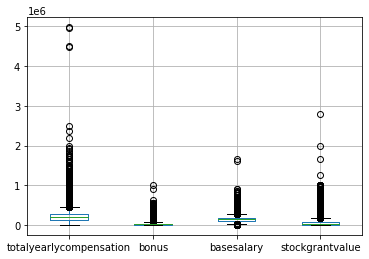

In [435]:
salaries_df.boxplot(column = ["totalyearlycompensation","bonus",'basesalary','stockgrantvalue'])
#There appear to be some high outlier values in totalyearlycompensation, and maybe stockgrantvalue

In [436]:
#Create a function to look for outliers
#copied from https://medium.com/@atanudan/exploratory-data-analysis-eda-in-python-893f963cc0c0
def findoutliers(column):
    outliers = []
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3-Q1
    lower_limit = Q1 - (1.5*IQR)
    upper_limit = Q3 + (1.5*IQR)
    for out1 in column:
        if out1>upper_limit or out1<lower_limit:
           outliers.append(out1) 
    return np.array(outliers)

In [437]:
#look for outliers in 4 salary columns
row_count = salaries_df.count()['rowNumber']
totalcomp_outliers = len(findoutliers(salaries_df.totalyearlycompensation))
bonus_outliers = len(findoutliers(salaries_df.bonus))
base_outliers = len(findoutliers(salaries_df.basesalary))
stock_outliers = len(findoutliers(salaries_df.stockgrantvalue))
print(f" There are {totalcomp_outliers} ({totalcomp_outliers/float(row_count)*100}%) outliers in the totalyearlycompensation column")
print(f" There are {bonus_outliers} ({bonus_outliers/float(row_count)*100}%) outliers in the bonus column")
print(f" There are {base_outliers} ({base_outliers/float(row_count)*100}%) outliers in the basesalary column")
print(f" There are {stock_outliers} ({stock_outliers/float(row_count)*100}%) outliers in the stockgrantvalue column")

 There are 3133 (5.0018359755416135%) outliers in the totalyearlycompensation column
 There are 2604 (4.157287226399732%) outliers in the bonus column
 There are 3509 (5.602120152625445%) outliers in the basesalary column
 There are 4683 (7.4764117055414525%) outliers in the stockgrantvalue column


In [438]:
#Look at maximum values for these four columns
print(f"The max value in the totalyearlycompensation column is {salaries_df.totalyearlycompensation.max()}.")
print(f"The max value in the bonus column is {salaries_df.bonus.max()}.")
print(f"The max value in the basesalary column is {salaries_df.basesalary.max()}.")
print(f"The max value in the stockgrantvalue column is {salaries_df.stockgrantvalue.max()}.")
#These values are high but not unreasonable in this field. I think we should keep them.

The max value in the totalyearlycompensation column is 4980000.
The max value in the bonus column is 1000000.0.
The max value in the basesalary column is 1659870.
The max value in the stockgrantvalue column is 2800000.0.


In [439]:
#Stockgrantvalue has some weird low values, between .0001 and .01. Check other 3 salary columns for the same thing
total_under1 = salaries_df[(salaries_df['totalyearlycompensation']<10) & (salaries_df['totalyearlycompensation']>0)]
print(f" There were {total_under1.count()['rowNumber']} values between 0 and 10 for total salary")
bonus_under1 = salaries_df[(salaries_df['bonus']<10) & (salaries_df['bonus']>0)]
print(f" There were {bonus_under1.count()['rowNumber']} values between 0 and 10 for bonus salary")
base_under1 = salaries_df[(salaries_df['basesalary']<10) & (salaries_df['basesalary']>0)]
print(f" There were {base_under1.count()['rowNumber']} values between 0 and 10 for base salary")
stock_under1 = salaries_df[(salaries_df['stockgrantvalue']<10) & (salaries_df['stockgrantvalue']>0)]
print(f" There were {stock_under1.count()['rowNumber']} values between 0 and 10 for stockgrantvalue")

 There were 0 values between 0 and 10 for total salary
 There were 0 values between 0 and 10 for bonus salary
 There were 0 values between 0 and 10 for base salary
 There were 2 values between 0 and 10 for stockgrantvalue


In [440]:
#Fix stockgrantvalue for two very small values
salaries_df['stockgrantvalue'] = salaries_df['stockgrantvalue'].map(lambda x:0 if x<0.01 else x)
salaries_df

,company,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,basesalary,stockgrantvalue,bonus,gender,...,Masters_Degree,Bachelors_Degree,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic
0,Oracle,Product Manager,127000,"Redwood City, CA",1.5,1.5,107000,20000.0,10000.0,none,...,0,0,0,0,0,0,0,0,0,0
1,eBay,Software Engineer,100000,"San Francisco, CA",5.0,3.0,0,0.0,0.0,none,...,0,0,0,0,0,0,0,0,0,0
2,Amazon,Product Manager,310000,"Seattle, WA",8.0,0.0,155000,0.0,0.0,none,...,0,0,0,0,0,0,0,0,0,0
3,Apple,Software Engineering Manager,372000,"Sunnyvale, CA",7.0,5.0,157000,180000.0,35000.0,none,...,0,0,0,0,0,0,0,0,0,0
4,Microsoft,Software Engineer,157000,"Mountain View, CA",5.0,3.0,0,0.0,0.0,none,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62637,Google,Software Engineer,327000,"Seattle, WA",10.0,1.0,155000,150000.0,22000.0,none,...,0,0,0,0,0,0,0,0,0,0
62638,Microsoft,Software Engineer,237000,"Redmond, WA",2.0,2.0,146900,73200.0,16000.0,none,...,0,0,0,0,0,0,0,0,0,0
62639,MSFT,Software Engineer,220000,"Seattle, WA",14.0,12.0,157000,25000.0,20000.0,none,...,0,0,0,0,0,0,0,0,0,0
62640,Salesforce,Software Engineer,280000,"San Francisco, CA",8.0,4.0,194688,57000.0,29000.0,none,...,0,0,0,0,0,0,0,0,0,0


<AxesSubplot:>

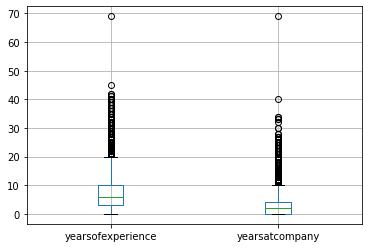

In [441]:
#Check years of experience and years at company for outliers
salaries_df.boxplot(column = ["yearsofexperience","yearsatcompany"])

In [442]:
experience_outliers = len(findoutliers(salaries_df.yearsofexperience))
yrscompany_outliers = len(findoutliers(salaries_df.yearsatcompany))
print(f" There are {experience_outliers} ({experience_outliers/float(row_count)*100}%) outliers in the yearsofexperience column")
print(f" There are {yrscompany_outliers} ({yrscompany_outliers/float(row_count)*100}%) outliers in the yearsatcompany column")

 There are 1439 (2.2973641777224323%) outliers in the yearsofexperience column
 There are 2006 (3.2025799447610837%) outliers in the yearsatcompany column


In [443]:
#Look at maximum values for these two columns
print(f"The max value in the yearsofexperience column is {salaries_df.yearsofexperience.max()}.")
print(f"The max value in the yearsatcompany column is {salaries_df.yearsatcompany.max()}.")

The max value in the yearsofexperience column is 69.0.
The max value in the yearsatcompany column is 69.0.


In [444]:
#69 years is a long time. 69 years ago was 1953. Let's look at folks with really long years to be sure it's not bogus
exp_over_40 = salaries_df.loc[salaries_df['yearsofexperience']>40]
exp_over_40

,company,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,basesalary,stockgrantvalue,bonus,gender,...,Masters_Degree,Bachelors_Degree,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic
9515,Amazon,Software Engineer,356000,"Seattle, WA",42.0,4.0,160000,196000.0,0.0,Male,...,0,0,0,0,0,0,0,0,0,0
9615,Amazon,Software Engineer,356000,"Seattle, WA",42.0,4.0,160000,196000.0,0.0,Male,...,0,0,0,0,0,0,0,0,0,0
10963,GoDaddy,Software Engineer,155000,"Phoenix, AZ",41.0,5.0,140000,3000.0,12000.0,Male,...,0,0,0,0,0,0,0,0,0,0
11020,Oracle,Software Engineer,185000,"San Francisco, CA",41.0,11.0,152000,30000.0,3000.0,Male,...,0,0,0,0,0,0,0,0,0,0
39957,IBM,Business Analyst,155000,"San Jose, CA",45.0,20.0,155000,0.0,0.0,Female,...,1,0,0,0,0,0,1,0,0,0
46988,Disney,Product Designer,102000,"Crapo, MD",69.0,69.0,100000,2000.0,0.0,none,...,0,0,0,0,0,0,0,0,0,0


In [445]:
#same check for years at company
yrs_over_40 = salaries_df.loc[salaries_df['yearsatcompany']>40]
yrs_over_40

,company,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,basesalary,stockgrantvalue,bonus,gender,...,Masters_Degree,Bachelors_Degree,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic
46988,Disney,Product Designer,102000,"Crapo, MD",69.0,69.0,100000,2000.0,0.0,none,...,0,0,0,0,0,0,0,0,0,0


In [446]:
#The location field for the companies in south korea had 3 commas, fixing that here
salaries_df['location'] = salaries_df['location'].map(lambda x:'Seoul, Korea, South' if x=='Seoul, KG, Korea, South' else x)
salaries_df['location'] = salaries_df['location'].map(lambda x:'Suwon, Korea, South' if x=='Suwon, KG, Korea, South' else x)
salaries_df

,company,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,basesalary,stockgrantvalue,bonus,gender,...,Masters_Degree,Bachelors_Degree,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic
0,Oracle,Product Manager,127000,"Redwood City, CA",1.5,1.5,107000,20000.0,10000.0,none,...,0,0,0,0,0,0,0,0,0,0
1,eBay,Software Engineer,100000,"San Francisco, CA",5.0,3.0,0,0.0,0.0,none,...,0,0,0,0,0,0,0,0,0,0
2,Amazon,Product Manager,310000,"Seattle, WA",8.0,0.0,155000,0.0,0.0,none,...,0,0,0,0,0,0,0,0,0,0
3,Apple,Software Engineering Manager,372000,"Sunnyvale, CA",7.0,5.0,157000,180000.0,35000.0,none,...,0,0,0,0,0,0,0,0,0,0
4,Microsoft,Software Engineer,157000,"Mountain View, CA",5.0,3.0,0,0.0,0.0,none,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62637,Google,Software Engineer,327000,"Seattle, WA",10.0,1.0,155000,150000.0,22000.0,none,...,0,0,0,0,0,0,0,0,0,0
62638,Microsoft,Software Engineer,237000,"Redmond, WA",2.0,2.0,146900,73200.0,16000.0,none,...,0,0,0,0,0,0,0,0,0,0
62639,MSFT,Software Engineer,220000,"Seattle, WA",14.0,12.0,157000,25000.0,20000.0,none,...,0,0,0,0,0,0,0,0,0,0
62640,Salesforce,Software Engineer,280000,"San Francisco, CA",8.0,4.0,194688,57000.0,29000.0,none,...,0,0,0,0,0,0,0,0,0,0


In [447]:
#Are there rows where years at company is greater than years of experience?
compyrs_greaterthan_exp = salaries_df.loc[(salaries_df['yearsatcompany'])>(salaries_df["yearsofexperience"])]
compyrs_greaterthan_exp
#There are 338 rows where experience at company is greater than total experience

,company,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,basesalary,stockgrantvalue,bonus,gender,...,Masters_Degree,Bachelors_Degree,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic
290,Amazon,Software Engineer,240000,"Seattle, WA",3.0,6.0,0,0.0,0.0,none,...,0,0,0,0,0,0,0,0,0,0
359,Intel,Software Engineer,196000,"Sunnyvale, CA",0.0,2.5,153000,15000.0,28000.0,Male,...,0,0,0,0,0,0,0,0,0,0
368,Intel,Product Manager,126000,"Santa Clara, CA",1.0,3.0,0,0.0,0.0,Female,...,0,0,0,0,0,0,0,0,0,0
403,Google,Software Engineer,196000,"Mountain View, CA",1.0,3.0,118000,60000.0,18000.0,Male,...,0,0,0,0,0,0,0,0,0,0
487,SAP,Software Engineer,120000,"Palo Alto, CA",0.0,1.5,113000,0.0,7000.0,Male,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62168,Yandex,Software Engineer,36000,"Moscow, MC, Russia",3.0,5.0,32000,0.0,4000.0,Male,...,0,0,0,0,0,0,0,0,0,0
62199,eBay,Software Engineer,80000,"Salt Lake City, UT",1.5,6.0,80000,1000.0,4500.0,Male,...,0,0,0,0,0,0,0,0,0,0
62239,SAP,Software Engineer,110000,"San Ramon, CA",0.0,2.0,103000,0.0,7000.0,Male,...,0,0,0,0,0,0,0,0,0,0
62261,TransUnion,Software Engineer,87000,"Chicago, IL",1.0,5.0,85000,0.0,2000.0,Male,...,0,0,0,0,0,0,0,0,0,0


In [448]:
#Where years at company is greater than years of experience, set years of experience equal to years at company
#code found at https://stackoverflow.com/questions/42405572/how-to-compare-two-columns-of-the-same-dataframe
salaries_df['yearsofexperience_cleaned']=np.where(salaries_df['yearsatcompany']>salaries_df['yearsofexperience'],salaries_df['yearsatcompany'],salaries_df['yearsofexperience'])

salaries_df['yearsofexperience_cleaned']

0         1.5
1         5.0
2         8.0
3         7.0
4         5.0
         ... 
62637    10.0
62638     2.0
62639    14.0
62640     8.0
62641     0.0
Name: yearsofexperience_cleaned, Length: 62637, dtype: float64

In [450]:
#drop the old years of experience column, rename the new years of experience column
salaries_df.drop(['yearsofexperience'],axis=1,inplace=True)
salaries_df.rename(columns = {'yearsofexperience_cleaned':'yearsofexperience'},inplace=True)
salaries_df

,company,title,totalyearlycompensation,location,yearsatcompany,basesalary,stockgrantvalue,bonus,gender,cityid,...,Bachelors_Degree,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,yearsofexperience
0,Oracle,Product Manager,127000,"Redwood City, CA",1.5,107000,20000.0,10000.0,none,7392,...,0,0,0,0,0,0,0,0,0,1.5
1,eBay,Software Engineer,100000,"San Francisco, CA",3.0,0,0.0,0.0,none,7419,...,0,0,0,0,0,0,0,0,0,5.0
2,Amazon,Product Manager,310000,"Seattle, WA",0.0,155000,0.0,0.0,none,11527,...,0,0,0,0,0,0,0,0,0,8.0
3,Apple,Software Engineering Manager,372000,"Sunnyvale, CA",5.0,157000,180000.0,35000.0,none,7472,...,0,0,0,0,0,0,0,0,0,7.0
4,Microsoft,Software Engineer,157000,"Mountain View, CA",3.0,0,0.0,0.0,none,7322,...,0,0,0,0,0,0,0,0,0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62637,Google,Software Engineer,327000,"Seattle, WA",1.0,155000,150000.0,22000.0,none,11527,...,0,0,0,0,0,0,0,0,0,10.0
62638,Microsoft,Software Engineer,237000,"Redmond, WA",2.0,146900,73200.0,16000.0,none,11521,...,0,0,0,0,0,0,0,0,0,2.0
62639,MSFT,Software Engineer,220000,"Seattle, WA",12.0,157000,25000.0,20000.0,none,11527,...,0,0,0,0,0,0,0,0,0,14.0
62640,Salesforce,Software Engineer,280000,"San Francisco, CA",4.0,194688,57000.0,29000.0,none,7419,...,0,0,0,0,0,0,0,0,0,8.0


In [451]:
#check that the correct values are in the new column yearsofexperience_cleaned
compyrs_greaterthan_exp_check = salaries_df.loc[(salaries_df['yearsatcompany'])>(salaries_df["yearsofexperience"])]
compyrs_greaterthan_exp_check

,company,title,totalyearlycompensation,location,yearsatcompany,basesalary,stockgrantvalue,bonus,gender,cityid,...,Bachelors_Degree,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,yearsofexperience


In [377]:
#Split location into city, state, country values
location_list = salaries_df['location'].str.split(',\s+',expand=True)
location_list.columns = ['city','state','country']
location_list

,city,state,country
0,Redwood City,CA,None
1,San Francisco,CA,None
2,Seattle,WA,None
3,Sunnyvale,CA,None
4,Mountain View,CA,None
...,...,...,...
62637,Seattle,WA,None
62638,Redmond,WA,None
62639,Seattle,WA,None
62640,San Francisco,CA,None


In [378]:
#Add city, state, country columns back into main dataframe
salaries_df = pd.concat([salaries_df,location_list],axis=1)
salaries_df

,company,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,basesalary,stockgrantvalue,bonus,gender,...,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,city,state,country
0,Oracle,Product Manager,127000,"Redwood City, CA",1.5,1.5,107000,20000.0,10000.0,none,...,0,0,0,0,0,0,0,Redwood City,CA,None
1,eBay,Software Engineer,100000,"San Francisco, CA",5.0,3.0,0,0.0,0.0,none,...,0,0,0,0,0,0,0,San Francisco,CA,None
2,Amazon,Product Manager,310000,"Seattle, WA",8.0,0.0,155000,0.0,0.0,none,...,0,0,0,0,0,0,0,Seattle,WA,None
3,Apple,Software Engineering Manager,372000,"Sunnyvale, CA",7.0,5.0,157000,180000.0,35000.0,none,...,0,0,0,0,0,0,0,Sunnyvale,CA,None
4,Microsoft,Software Engineer,157000,"Mountain View, CA",5.0,3.0,0,0.0,0.0,none,...,0,0,0,0,0,0,0,Mountain View,CA,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62637,Google,Software Engineer,327000,"Seattle, WA",10.0,1.0,155000,150000.0,22000.0,none,...,0,0,0,0,0,0,0,Seattle,WA,None
62638,Microsoft,Software Engineer,237000,"Redmond, WA",2.0,2.0,146900,73200.0,16000.0,none,...,0,0,0,0,0,0,0,Redmond,WA,None
62639,MSFT,Software Engineer,220000,"Seattle, WA",14.0,12.0,157000,25000.0,20000.0,none,...,0,0,0,0,0,0,0,Seattle,WA,None
62640,Salesforce,Software Engineer,280000,"San Francisco, CA",8.0,4.0,194688,57000.0,29000.0,none,...,0,0,0,0,0,0,0,San Francisco,CA,None


In [379]:
#Fill USA in for country columm for US companies 
salaries_df['country'].fillna('USA', inplace=True)
salaries_df

,company,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,basesalary,stockgrantvalue,bonus,gender,...,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,city,state,country
0,Oracle,Product Manager,127000,"Redwood City, CA",1.5,1.5,107000,20000.0,10000.0,none,...,0,0,0,0,0,0,0,Redwood City,CA,USA
1,eBay,Software Engineer,100000,"San Francisco, CA",5.0,3.0,0,0.0,0.0,none,...,0,0,0,0,0,0,0,San Francisco,CA,USA
2,Amazon,Product Manager,310000,"Seattle, WA",8.0,0.0,155000,0.0,0.0,none,...,0,0,0,0,0,0,0,Seattle,WA,USA
3,Apple,Software Engineering Manager,372000,"Sunnyvale, CA",7.0,5.0,157000,180000.0,35000.0,none,...,0,0,0,0,0,0,0,Sunnyvale,CA,USA
4,Microsoft,Software Engineer,157000,"Mountain View, CA",5.0,3.0,0,0.0,0.0,none,...,0,0,0,0,0,0,0,Mountain View,CA,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62637,Google,Software Engineer,327000,"Seattle, WA",10.0,1.0,155000,150000.0,22000.0,none,...,0,0,0,0,0,0,0,Seattle,WA,USA
62638,Microsoft,Software Engineer,237000,"Redmond, WA",2.0,2.0,146900,73200.0,16000.0,none,...,0,0,0,0,0,0,0,Redmond,WA,USA
62639,MSFT,Software Engineer,220000,"Seattle, WA",14.0,12.0,157000,25000.0,20000.0,none,...,0,0,0,0,0,0,0,Seattle,WA,USA
62640,Salesforce,Software Engineer,280000,"San Francisco, CA",8.0,4.0,194688,57000.0,29000.0,none,...,0,0,0,0,0,0,0,San Francisco,CA,USA


In [380]:
#Drop the original location column since we now have city, state, country split out from it
salaries_df = salaries_df.drop(['location'], axis=1)
salaries_df

,company,title,totalyearlycompensation,yearsofexperience,yearsatcompany,basesalary,stockgrantvalue,bonus,gender,cityid,...,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,city,state,country
0,Oracle,Product Manager,127000,1.5,1.5,107000,20000.0,10000.0,none,7392,...,0,0,0,0,0,0,0,Redwood City,CA,USA
1,eBay,Software Engineer,100000,5.0,3.0,0,0.0,0.0,none,7419,...,0,0,0,0,0,0,0,San Francisco,CA,USA
2,Amazon,Product Manager,310000,8.0,0.0,155000,0.0,0.0,none,11527,...,0,0,0,0,0,0,0,Seattle,WA,USA
3,Apple,Software Engineering Manager,372000,7.0,5.0,157000,180000.0,35000.0,none,7472,...,0,0,0,0,0,0,0,Sunnyvale,CA,USA
4,Microsoft,Software Engineer,157000,5.0,3.0,0,0.0,0.0,none,7322,...,0,0,0,0,0,0,0,Mountain View,CA,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62637,Google,Software Engineer,327000,10.0,1.0,155000,150000.0,22000.0,none,11527,...,0,0,0,0,0,0,0,Seattle,WA,USA
62638,Microsoft,Software Engineer,237000,2.0,2.0,146900,73200.0,16000.0,none,11521,...,0,0,0,0,0,0,0,Redmond,WA,USA
62639,MSFT,Software Engineer,220000,14.0,12.0,157000,25000.0,20000.0,none,11527,...,0,0,0,0,0,0,0,Seattle,WA,USA
62640,Salesforce,Software Engineer,280000,8.0,4.0,194688,57000.0,29000.0,none,7419,...,0,0,0,0,0,0,0,San Francisco,CA,USA


In [381]:
#Write cleaned data to output file
salaries_df.to_csv("Resources/Cleaned_Salary_Data.csv",index=False)